In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 

In [17]:
df = pd.read_csv('data/data_2d.csv', header=None)
df_mnist = pd.read_csv('data/mnist.csv', header=None)

In [18]:
df.columns =['feature_1', 'feature_2', 'feature_3']

In [22]:
df.head()

,feature_1,feature_2,feature_3
0,0.0,-0.768716,0.460860
1,0.0,2.687848,2.366961
2,0.0,-0.201379,0.470430
3,0.0,0.608496,1.225400
4,0.0,-0.082282,1.137218


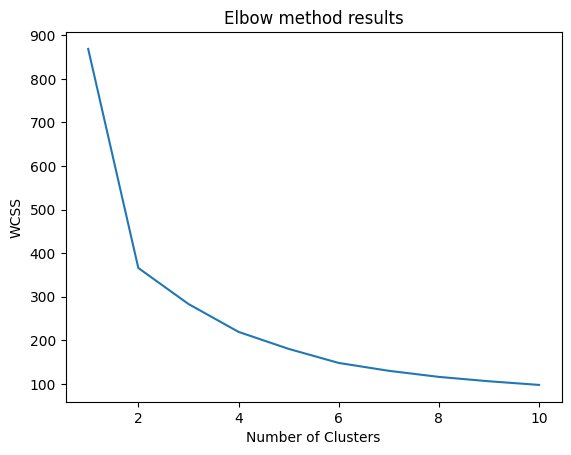

In [23]:
from sklearn.cluster import KMeans

def elbow_method(data):
    wcss = [] #  Within-Cluster Sum of Squares
    for k in range(1,11):
        kmeans_model = KMeans(n_clusters=k, random_state=42, n_init=10)
        kmeans_model.fit(data)
        wcss.append(kmeans_model.inertia_)

    plt.plot(range(1,11), wcss)
    plt.xlabel("Number of Clusters")
    plt.ylabel("WCSS")
    plt.title("Elbow method results")
    plt.show()

elbow_method(df)

In [24]:
k_conf = 3
kmeans_2d_model = KMeans(n_clusters=k_conf, random_state=42, n_init=10)
df['predictions'] = kmeans_2d_model.fit_predict(df) 

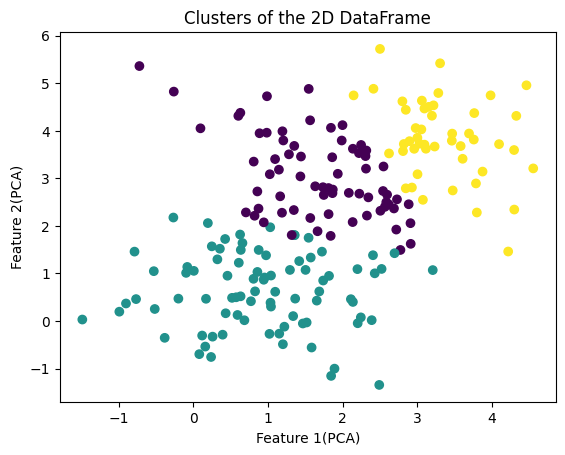

In [28]:
plt.scatter(df['feature_2'], df['feature_3'], c=df['predictions'], cmap='viridis')
plt.xlabel("Feature 1(PCA)")
plt.ylabel("Feature 2(PCA)")
plt.title("Clusters of the 2D DataFrame")
plt.show()

In [29]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_mnist_scaled = scaler.fit_transform(df_mnist)

In [30]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
df_mnist_final = pca.fit_transform(df_mnist_scaled)

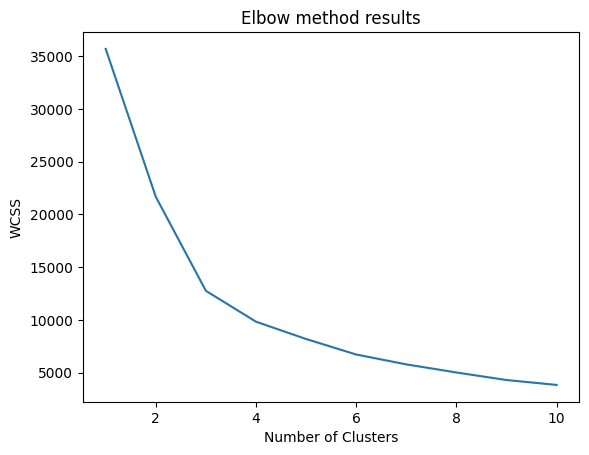

In [31]:
elbow_method(df_mnist_final)

In [32]:
k_conf_mnist = 4
kmeans_mnist_model = KMeans(n_clusters=k_conf_mnist, random_state=42, n_init=10)
mnist_clusters = kmeans_mnist_model.fit_predict(df_mnist_final)

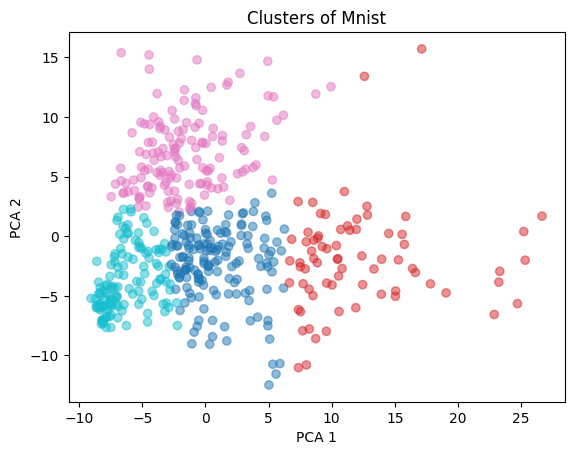

In [ ]:
plt.scatter(df_mnist_final[:, 0], df_mnist_final[:, 1], c=mnist_clusters, cmap='tab10', alpha=0.5)
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.title("Clusters of Mnist")
plt.show()